In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 


filename = "data/" + "0"+ str(25) + '/'
        
measurements = pd.read_csv(filename+ "measurements.csv")
stations = pd.read_csv(filename+ "stations.csv")

measurements = pd.read_csv(filename+ "measurements.csv",sep ='\t')
stations = pd.read_csv(filename+ "stations.csv",sep ='\t')

<h2> Integrácia a čistenie dát

<h3> Enumeracia a čistenie hodnôt

In [2]:
measurements = measurements.drop_duplicates(keep='last')
measurements.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 12100
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       11874 non-null  float64
 1   NH3        11874 non-null  float64
 2   warning    11874 non-null  float64
 3   H2CO       11874 non-null  float64
 4   SO2        11874 non-null  float64
 5   TEMP       11874 non-null  float64
 6   C2H3NO5    11874 non-null  float64
 7   Pb         11874 non-null  float64
 8   NOx        11874 non-null  float64
 9   PM2.5      11874 non-null  float64
 10  latitude   11922 non-null  float64
 11  PRES       11922 non-null  float64
 12  longitude  11922 non-null  float64
 13  CH4        11874 non-null  float64
 14  PAHs       11874 non-null  float64
 15  CFCs       11874 non-null  float64
 16  CO         11874 non-null  float64
 17  O3         11874 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [3]:
stations['QoS'] = stations['QoS'].str.replace('accep' , 'acceptable')
stations['QoS'] = stations['QoS'].str.replace('maitennce' , 'maintenance')

stations.QoS = pd.Categorical(stations.QoS)
stations['QoS'] = stations.QoS.cat.codes.astype(float)
stations

,location,revision,longitude,QoS,code,latitude
0,Asia/Manila,"08/11/2021, 00:00:00",120.89694,4.0,PH,14.95472
1,Europe/Paris,11 Mar 2020,2.12213,0.0,FR,48.82220
2,Europe/Istanbul,2022/07/03,42.85693,0.0,TR,39.22493
3,Asia/Tokyo,2015/08/20,136.84186,2.0,JP,34.48330
4,Asia/Shanghai,02 Mar 2019,117.65694,2.0,CN,36.19278
...,...,...,...,...,...,...
1073,Asia/Taipei,"01/27/2019, 00:00:00",119.58627,5.0,TW,23.56540
1074,Asia/Shanghai,2014-02-20,122.74754,2.0,CN,40.85158
1075,Europe/Berlin,2018-05-01,8.86704,0.0,DE,50.23805
1076,Asia/Colombo,2016-04-12,79.88300,2.0,LK,6.99090


In [4]:
stations.code = pd.Categorical(stations.code)
stations['code'] = stations.code.cat.codes.astype(float)
stations

,location,revision,longitude,QoS,code,latitude
0,Asia/Manila,"08/11/2021, 00:00:00",120.89694,4.0,78.0,14.95472
1,Europe/Paris,11 Mar 2020,2.12213,0.0,35.0,48.82220
2,Europe/Istanbul,2022/07/03,42.85693,0.0,98.0,39.22493
3,Asia/Tokyo,2015/08/20,136.84186,2.0,50.0,34.48330
4,Asia/Shanghai,02 Mar 2019,117.65694,2.0,20.0,36.19278
...,...,...,...,...,...,...
1073,Asia/Taipei,"01/27/2019, 00:00:00",119.58627,5.0,100.0,23.56540
1074,Asia/Shanghai,2014-02-20,122.74754,2.0,20.0,40.85158
1075,Europe/Berlin,2018-05-01,8.86704,0.0,25.0,50.23805
1076,Asia/Colombo,2016-04-12,79.88300,2.0,54.0,6.99090


In [5]:
stations['revision'] = stations['revision'].str.replace(', 00:00:00' , '')
stations['revision'] = stations['revision'].str.replace('/' , '-')
stations['revision'] = stations['revision'].str.replace(' ' , '-')

stations['revision'] = stations['revision'].str.replace('Jan' , '01')
stations['revision'] = stations['revision'].str.replace('Feb' , '02')
stations['revision'] = stations['revision'].str.replace('Mar' , '03')
stations['revision'] = stations['revision'].str.replace('Apr' , '04')
stations['revision'] = stations['revision'].str.replace('May' , '05')
stations['revision'] = stations['revision'].str.replace('Jun' , '06')
stations['revision'] = stations['revision'].str.replace('Jul' , '07')
stations['revision'] = stations['revision'].str.replace('Aug' , '08')
stations['revision'] = stations['revision'].str.replace('Aug' , '09')
stations['revision'] = stations['revision'].str.replace('Oct' , '10')
stations['revision'] = stations['revision'].str.replace('Aug' , '11')
stations['revision'] = stations['revision'].str.replace('Dec' , '12')

stations['revision'] = stations['revision'].astype('datetime64')
stations['revision']


C:\Users\Imr\AppData\Local\Temp\ipykernel_13680\13108776.py:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stations['revision'] = stations['revision'].astype('datetime64')


0      2021-08-11
1      2020-11-03
2      2022-07-03
3      2015-08-20
4      2019-02-03
          ...    
1073   2019-01-27
1074   2014-02-20
1075   2018-05-01
1076   2016-04-12
1077   2018-03-18
Name: revision, Length: 1078, dtype: datetime64[ns]

<h2> Merge dát

In [6]:
stations.drop('location', inplace=True, axis=1)
merged_df = pd.merge( measurements, stations, left_on=["longitude", "latitude"], right_on=["longitude", "latitude"])
merged_df = merged_df.sort_values(['PM10', 'revision'])

In [7]:
merged_df = merged_df.drop_duplicates(subset=merged_df.columns.difference(['revision', 'QoS']), keep='last')

merged_df.drop('revision', inplace=True, axis=1)

<h3> Chýbajúce hodnoty

<AxesSubplot: >

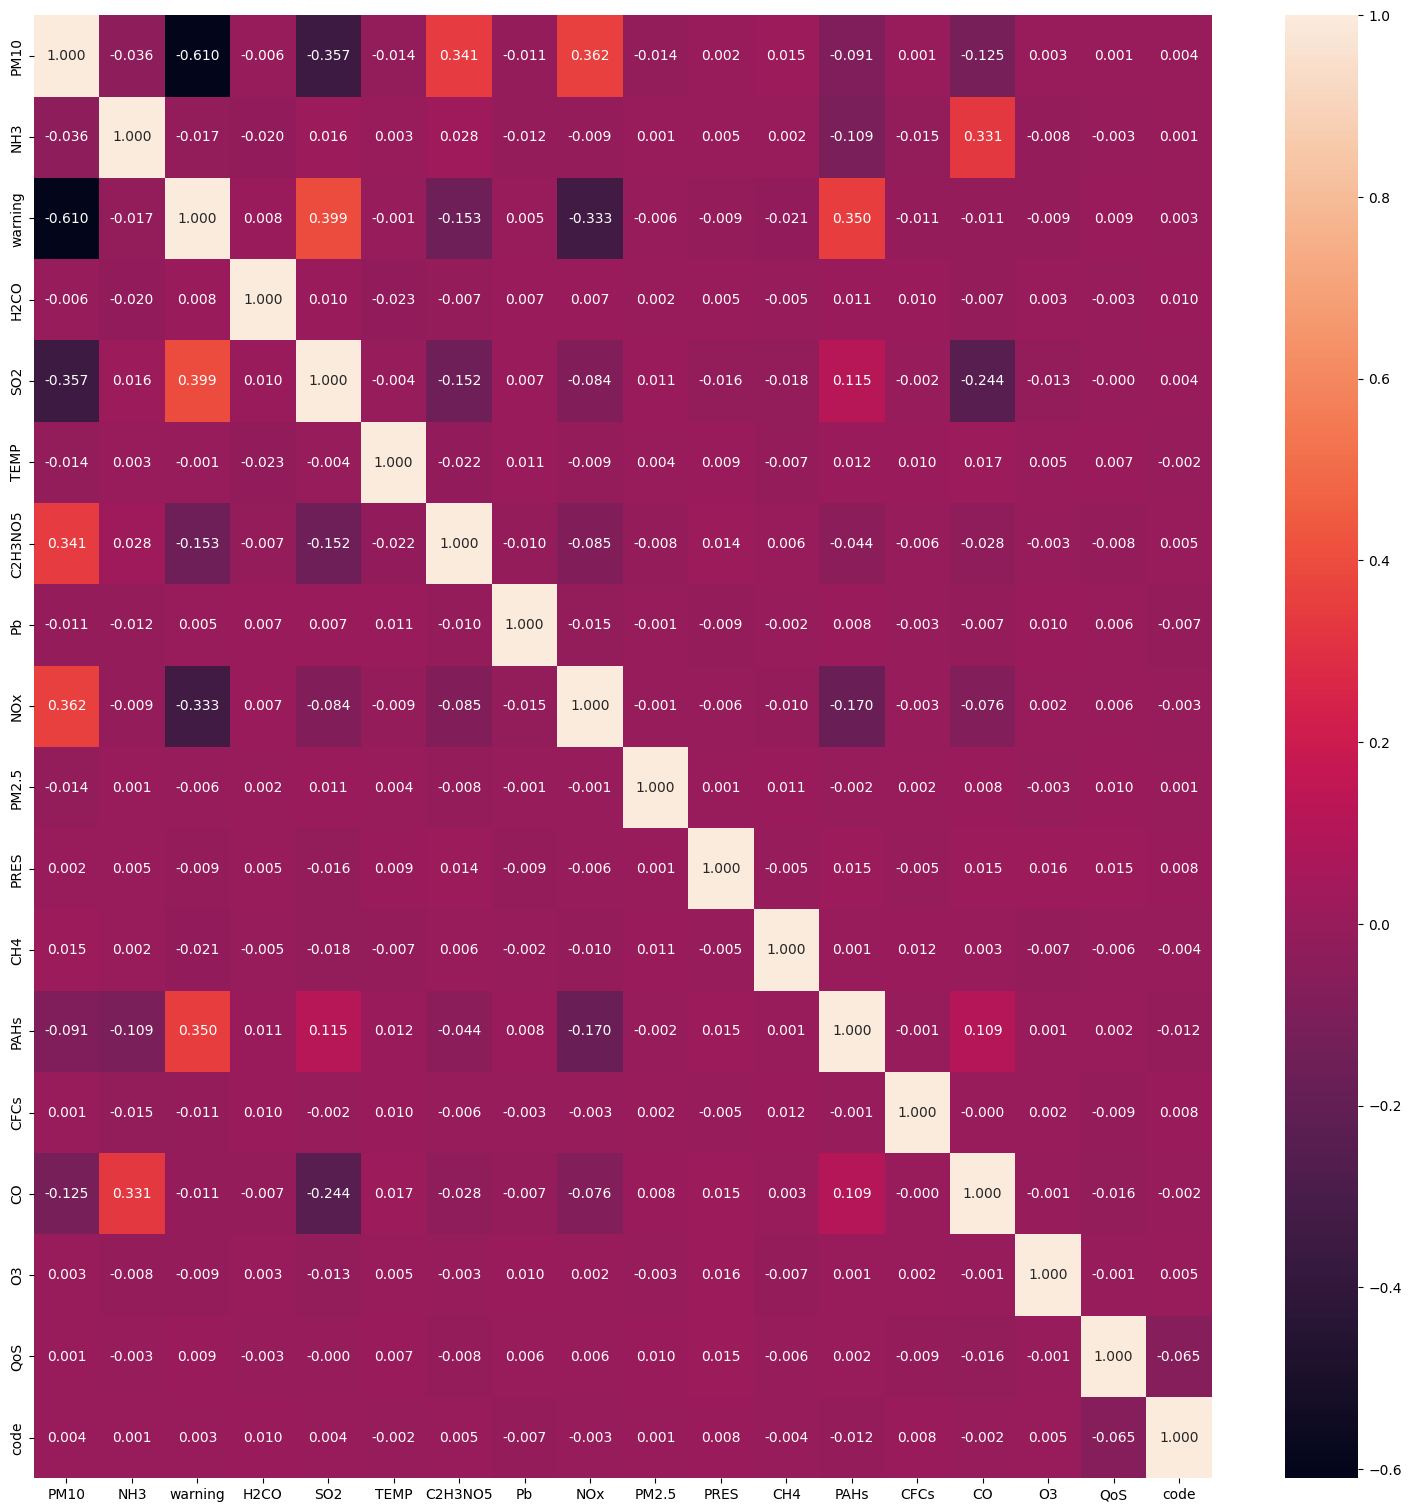

In [8]:
df_helper = merged_df.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(19,19))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

1. spôsob - odstranenie riadky s Nan

In [9]:
df_notNaN = merged_df.dropna()
df_notNaN

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,QoS,code
9395,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,5.0,50.0
18203,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,0.0,104.0
23297,1.92294,6.12330,0.0,42.49213,8.92464,18.74332,0.02261,56.03857,10.65109,8.45716,52.86147,1139.68250,9.59260,5.64244,6.94828,58.53332,10.98644,8.19369,2.0,25.0
23603,1.97938,9.11890,1.0,36.22247,11.99484,31.62963,0.01640,56.31090,2.77872,7.77193,53.60520,1172.84385,10.03988,8.33982,6.94882,41.30673,10.85826,8.01728,5.0,25.0
9850,2.10977,7.62776,1.0,53.42406,9.37819,30.03365,0.01268,57.19336,1.64760,7.77939,36.82167,1129.72212,128.63083,8.07895,8.92143,51.00852,11.02360,8.29536,4.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,14.94598,4.70685,0.0,62.20664,6.16027,18.72696,32.23243,66.76951,2.61913,5.80745,61.78491,1056.91567,34.34691,7.19553,7.56238,64.79269,6.53655,9.01320,2.0,87.0
5492,15.07371,5.75426,0.0,44.66235,4.30337,13.73241,36.62120,32.60755,4.76050,9.01668,50.75932,1191.41935,25.34244,8.46179,5.60051,49.47022,8.96852,8.38590,5.0,102.0
19511,15.42505,6.59000,0.0,31.82326,4.83486,10.75505,52.02110,36.56786,4.50695,7.52987,37.65639,1161.19837,126.83500,6.78713,5.08149,59.99242,9.03776,6.47171,4.0,52.0
7908,15.70272,5.81075,0.0,34.57399,4.83875,22.78161,68.66530,24.69153,4.63928,7.06878,50.76306,1173.56796,-1.29772,7.35910,6.34027,52.04194,8.46634,8.75554,2.0,37.0


<AxesSubplot: >

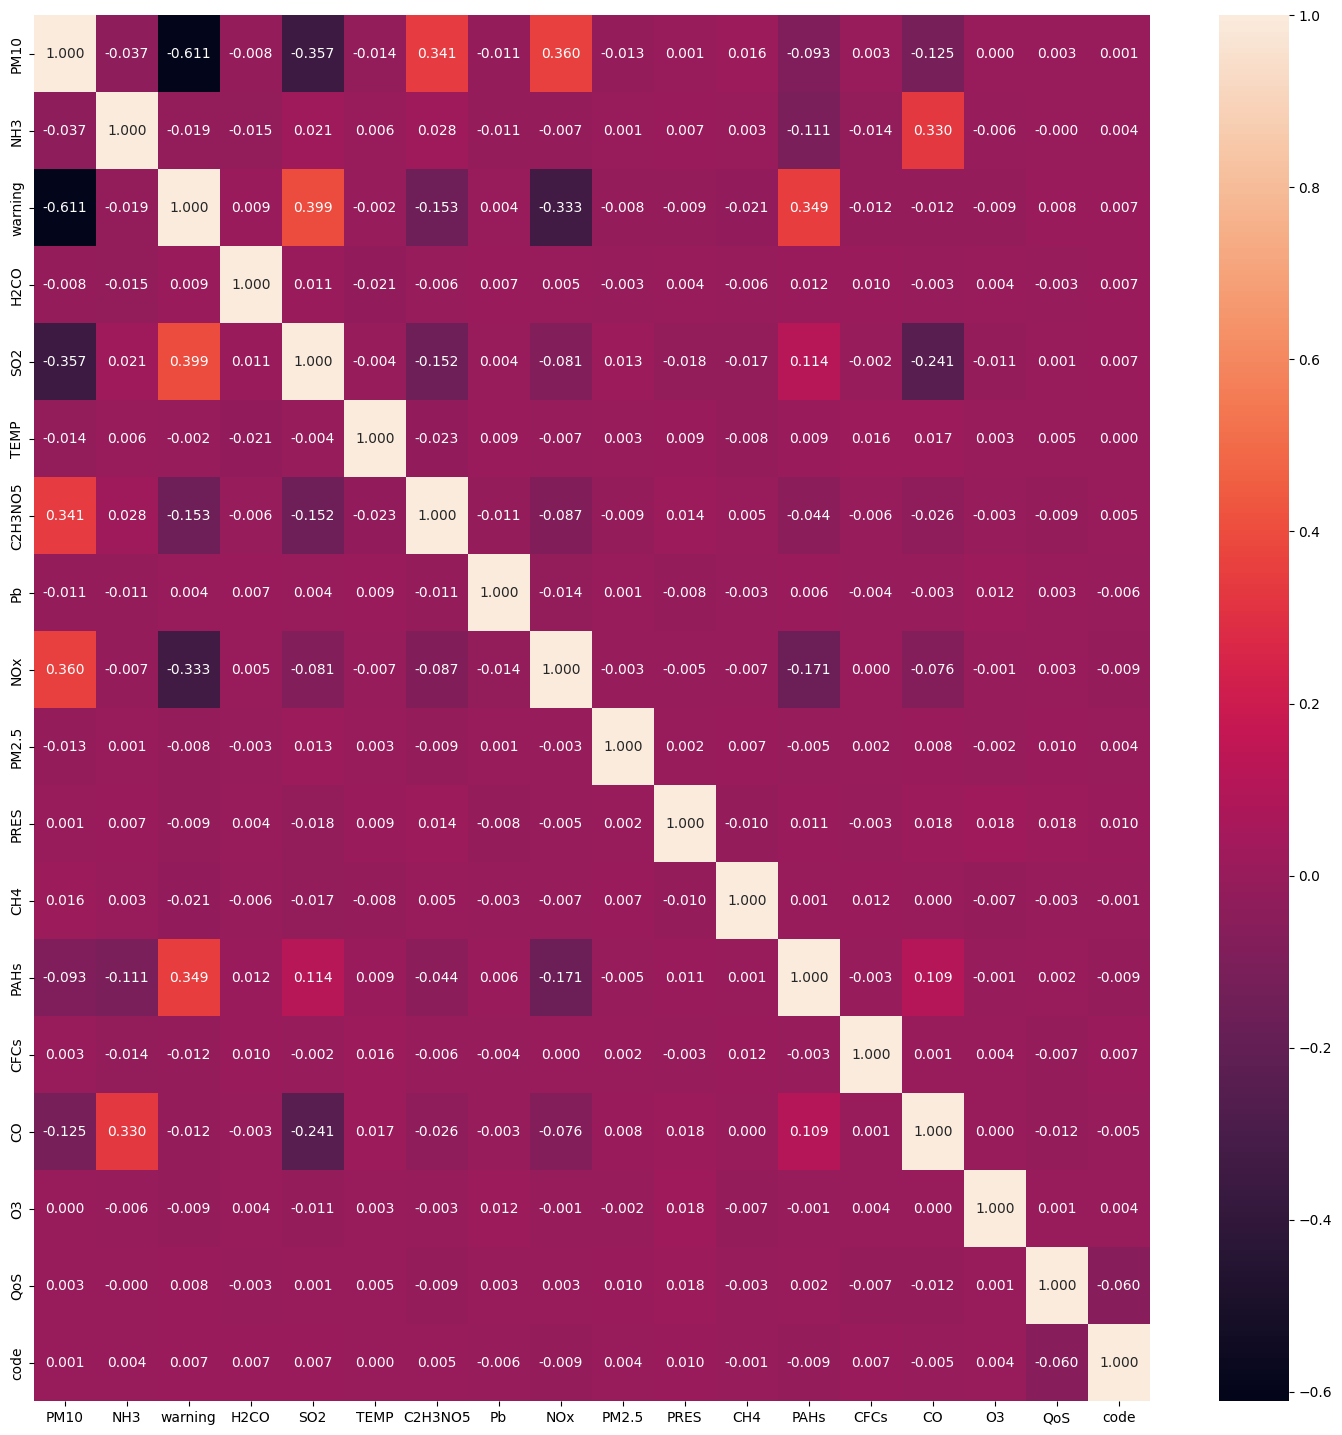

In [10]:
df_helper = df_notNaN.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

2. spôsob - nahradenie Nan hodnoty s mean stlpcov

In [11]:
df_median = merged_df.copy()
for key, value in merged_df.items():
    if key == 'QoS' or  key == 'code':
        continue
    df_median[key] = merged_df[key].fillna(merged_df[key].median())
    

In [12]:
df_median

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,QoS,code
9395,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,5.0,50.0
18203,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,0.0,104.0
23297,1.92294,6.12330,0.0,42.49213,8.92464,18.74332,0.02261,56.03857,10.65109,8.45716,52.86147,1139.68250,9.59260,5.64244,6.94828,58.53332,10.98644,8.19369,2.0,25.0
23603,1.97938,9.11890,1.0,36.22247,11.99484,31.62963,0.01640,56.31090,2.77872,7.77193,53.60520,1172.84385,10.03988,8.33982,6.94882,41.30673,10.85826,8.01728,5.0,25.0
9850,2.10977,7.62776,1.0,53.42406,9.37819,30.03365,0.01268,57.19336,1.64760,7.77939,36.82167,1129.72212,128.63083,8.07895,8.92143,51.00852,11.02360,8.29536,4.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,7.51766,3.18388,0.0,77.10040,7.65403,4.29784,0.02605,36.39424,6.52743,6.95955,36.53333,1074.56725,136.61667,7.74064,7.40476,56.45306,8.33252,6.92939,5.0,50.0
8292,7.51766,7.63092,1.0,69.99464,9.96434,14.48800,0.02217,39.65670,7.12350,9.17368,33.35283,1088.57356,-111.78903,8.04920,4.30698,36.23320,9.14300,7.87126,5.0,104.0
23135,7.51766,10.63082,1.0,81.72325,10.79284,18.20523,0.02271,38.03435,4.98769,9.17851,49.97704,1097.96773,9.15214,8.60179,4.71607,56.61691,9.82429,7.83245,4.0,25.0
15191,7.51766,6.44967,0.0,46.31520,10.11851,23.80405,0.30268,63.64611,8.79477,7.01825,36.00000,1191.40071,139.55722,7.35800,7.37431,43.52054,3.89063,7.44424,6.0,50.0


<AxesSubplot: >

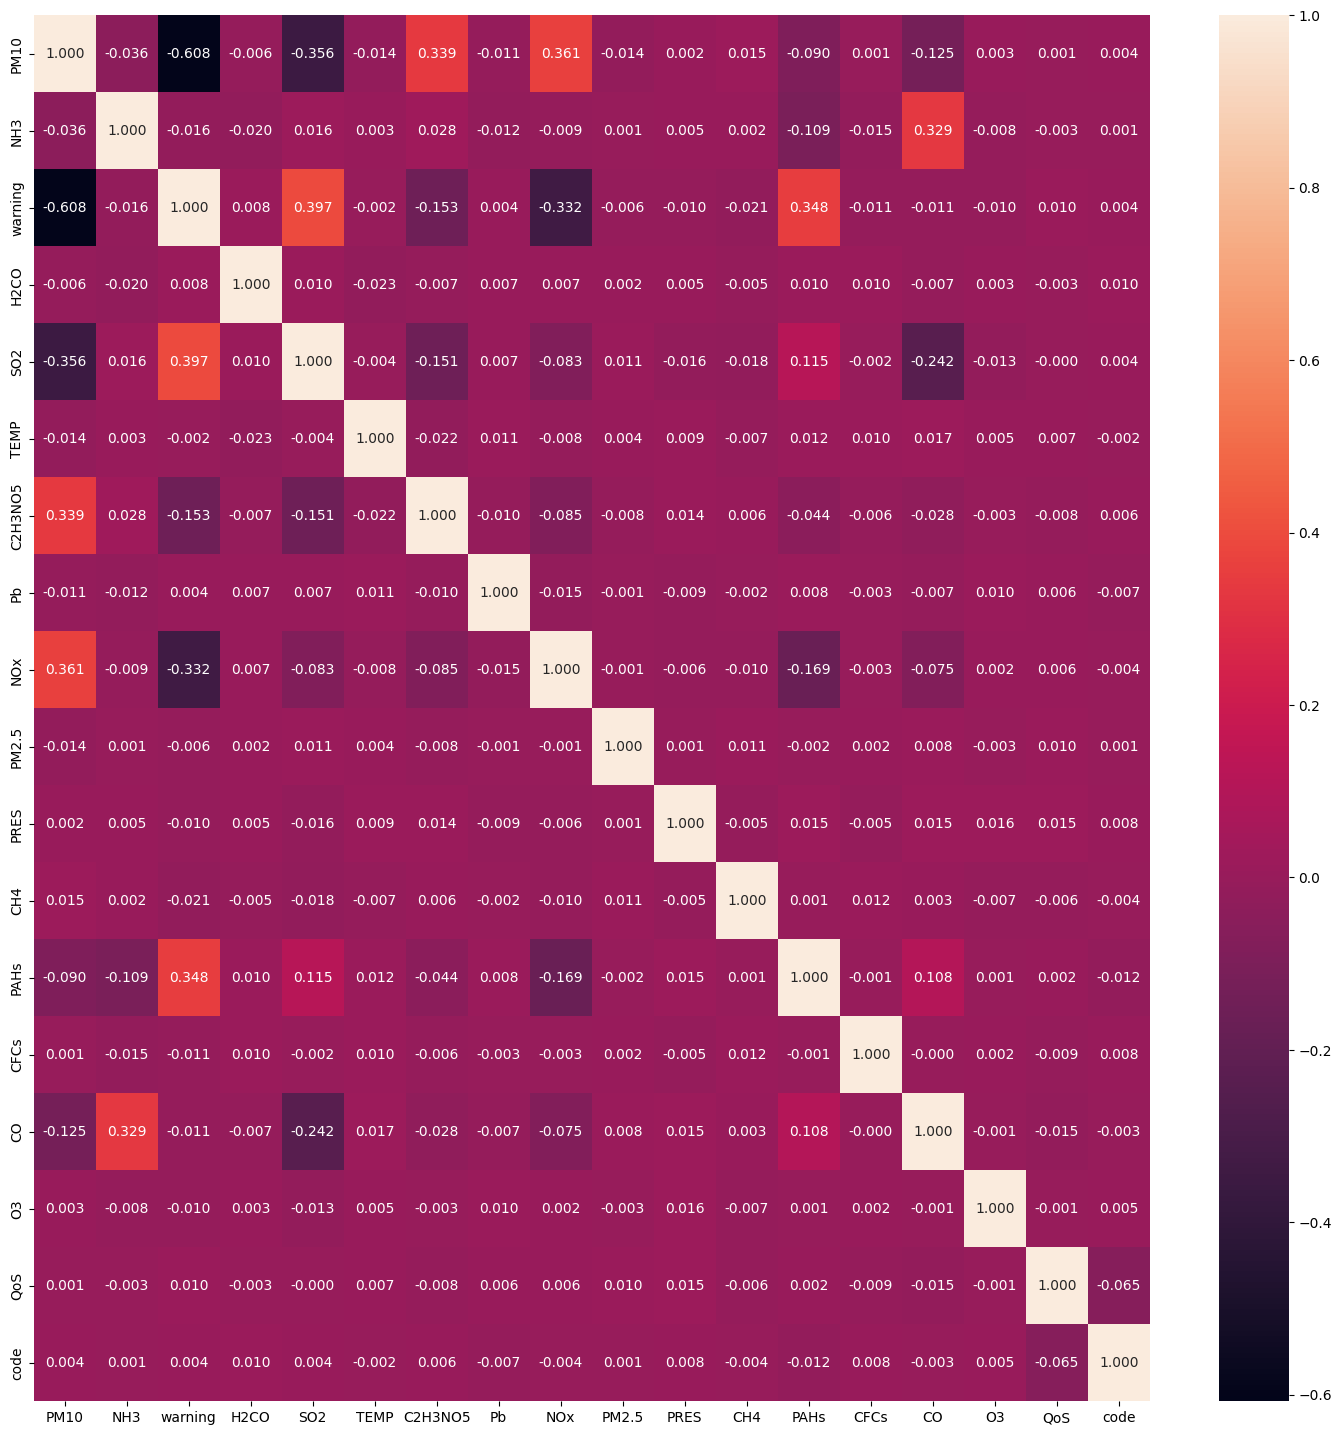

In [13]:
df_helper = df_median.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

<h2> Vychýlene hodnoty

<h3>Odstraňovanie pomocou Smerodajnej odchýlky

In [14]:
df_notNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11220 entries, 9395 to 3851
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       11220 non-null  float64
 1   NH3        11220 non-null  float64
 2   warning    11220 non-null  float64
 3   H2CO       11220 non-null  float64
 4   SO2        11220 non-null  float64
 5   TEMP       11220 non-null  float64
 6   C2H3NO5    11220 non-null  float64
 7   Pb         11220 non-null  float64
 8   NOx        11220 non-null  float64
 9   PM2.5      11220 non-null  float64
 10  latitude   11220 non-null  float64
 11  PRES       11220 non-null  float64
 12  longitude  11220 non-null  float64
 13  CH4        11220 non-null  float64
 14  PAHs       11220 non-null  float64
 15  CFCs       11220 non-null  float64
 16  CO         11220 non-null  float64
 17  O3         11220 non-null  float64
 18  QoS        11220 non-null  float64
 19  code       11220 non-null  float64
dtypes: f

In [22]:
df_notNaN_mean, df_notNaN_std = df_notNaN.mean(), df_notNaN.std()

# define outliers
cut_off = df_notNaN_std * 3
lower, upper = df_notNaN_mean - cut_off, df_notNaN_mean + cut_off 
# identify outliers


for key in measurements.columns:
    if key == 'warning' or key == 'longitude' or key == 'latitude':
        continue
    df_notNaN_std = df_notNaN[(df_notNaN[key] <= upper[key]) & (df_notNaN[key] >= lower[key])]

df_notNaN_std.shape

(11184, 20)

<h3>Odstraňovanie pomocou Smerodajnej odchýlky


In [23]:
# calculate interquartile range
q25, q75 = df_notNaN.quantile(.25, axis = 0), df_notNaN.quantile(.75, axis = 0)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off


for key in measurements.columns:
    if key == 'warning' or key == 'longitude' or key == 'latitude':
        continue
    df_notNaN_iqr = df_notNaN[(df_notNaN[key] <= upper[key]) & (df_notNaN[key] >= lower[key])]

df_notNaN_iqr.shape

(11131, 20)

<h2> Realizácia predspracovania dát

In [17]:

train, test = train_test_split(df_notNaN, test_size=0.25)

In [18]:
train

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,QoS,code
24579,7.45652,8.19597,1.0,16.37389,10.28971,6.40893,0.03436,62.44522,7.13608,8.01186,45.75279,1178.79710,130.57211,8.83742,9.51273,52.94739,10.84630,8.75291,2.0,20.0
21568,6.36984,7.28449,1.0,44.40061,9.88033,8.36175,0.02591,54.99806,6.90685,7.45312,36.76639,1051.84205,3.47717,6.79989,5.62596,47.42982,7.27396,7.74981,4.0,28.0
21347,5.86486,6.84474,1.0,50.79403,11.00627,23.81604,0.02336,64.18684,6.73912,8.41351,50.50301,1110.46533,13.63617,6.45442,5.48444,60.32051,6.13131,8.64489,5.0,24.0
15209,8.18284,4.59347,1.0,37.30271,8.97665,6.83637,0.05700,22.36065,8.02875,6.73515,36.00000,1186.78780,139.55722,8.17095,8.37207,40.13786,5.44820,8.78414,6.0,50.0
16190,9.87055,6.37108,1.0,71.85183,9.94391,15.37026,0.23376,20.52459,8.39772,7.47172,53.37596,1123.80826,51.34520,9.00753,6.79066,39.55605,5.76600,6.34373,2.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,7.13916,5.69813,1.0,47.77956,8.35019,25.16364,0.03832,38.33473,7.40631,8.17704,25.87972,1093.93347,-97.50417,9.32597,10.09966,39.55279,7.66015,7.36945,4.0,66.0
7075,6.77033,7.09877,0.0,49.86729,6.74300,11.25266,0.03503,28.32512,11.08005,7.66944,41.10530,1126.96040,-7.32097,7.99042,5.33783,28.30577,9.49251,8.07116,0.0,83.0
2471,6.60349,4.64877,1.0,70.74055,8.45147,10.14503,0.02478,47.46446,6.35804,8.38495,42.00000,1078.48071,21.32778,8.34140,8.52602,57.02062,8.12182,8.08116,3.0,61.0
21925,8.97174,3.43259,1.0,26.16580,7.77949,24.49333,0.10177,42.76820,8.96239,8.57613,4.92675,1180.37202,6.26764,7.96239,9.84964,55.19968,4.00361,7.76380,3.0,70.0


<h2> Skálovanie dát 

In [19]:
# define min max scaler
scaler = MinMaxScaler()
train_xn = train.copy()
train_xn[train.columns] = scaler.fit_transform(train) 

train_xn

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,QoS,code
24579,0.447234,0.641517,1.0,0.142853,0.692020,0.358763,0.000344,0.624452,0.471409,0.491588,0.813545,0.858705,0.858191,0.600029,0.636873,0.529474,0.817352,0.631256,0.333333,0.180180
21568,0.377568,0.566079,1.0,0.430120,0.654600,0.384294,0.000259,0.549981,0.454402,0.422798,0.740838,0.011873,0.478212,0.315217,0.317206,0.474298,0.526588,0.491786,0.666667,0.252252
21347,0.345194,0.529683,1.0,0.495651,0.757519,0.586338,0.000234,0.641868,0.441959,0.541038,0.851978,0.402910,0.508584,0.266926,0.305567,0.603205,0.433584,0.616237,0.833333,0.216216
15209,0.493798,0.343359,1.0,0.357368,0.571997,0.364351,0.000570,0.223607,0.537635,0.334403,0.734638,0.912005,0.885054,0.506868,0.543059,0.401379,0.377984,0.635598,1.000000,0.450450
16190,0.601996,0.490481,1.0,0.711488,0.660411,0.475921,0.002338,0.205246,0.565008,0.425088,0.875222,0.491911,0.621324,0.623807,0.412996,0.395560,0.403851,0.296285,0.333333,0.783784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,0.426888,0.434785,1.0,0.464753,0.514734,0.603956,0.000383,0.383347,0.491457,0.511925,0.652757,0.292637,0.176305,0.668320,0.685145,0.395528,0.558021,0.438900,0.666667,0.594595
7075,0.403243,0.550708,0.0,0.486152,0.367824,0.422088,0.000350,0.283251,0.764007,0.449430,0.775943,0.512937,0.445928,0.481632,0.293509,0.283058,0.707163,0.536466,0.000000,0.747748
2471,0.392547,0.347936,1.0,0.700098,0.523991,0.407608,0.000248,0.474645,0.413687,0.537522,0.783182,0.189562,0.531580,0.530694,0.555721,0.570206,0.595598,0.537856,0.500000,0.549550
21925,0.544374,0.247280,1.0,0.243218,0.462567,0.595192,0.001018,0.427682,0.606901,0.561059,0.483233,0.869210,0.486554,0.477714,0.664582,0.551997,0.260404,0.493731,0.500000,0.630631


In [20]:
# define min max scaler
scaler = StandardScaler()
train_xs = train.copy()
train_xs[train.columns] = scaler.fit_transform(train) 

train_xs

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,QoS,code
24579,-0.121511,1.098713,0.824403,-2.496287,0.997755,-0.873673,-0.126206,1.186333,-0.034706,0.057176,0.776372,1.248101,1.618366,0.876857,1.197980,0.392844,1.553367,0.781854,-0.487653,-1.109123
21568,-0.669661,0.442800,0.824403,-0.433736,0.736319,-0.676291,-0.130640,0.620903,-0.158007,-0.500300,0.402300,-1.677208,-0.092448,-1.194787,-1.042535,-0.051388,-0.394275,-0.224017,0.517761,-0.870091
21347,-0.924386,0.126350,0.824403,0.036770,1.455360,0.885757,-0.131978,1.318567,-0.248228,0.457917,0.974106,-0.326406,0.044301,-1.546041,-1.124114,0.986470,-1.017248,0.673536,1.020469,-0.989607
15209,0.244864,-1.493694,0.824403,-0.956087,0.159217,-0.830470,-0.114325,-1.857115,0.445455,-1.216646,0.370398,1.432223,1.739313,0.199229,0.540451,-0.638481,-1.389680,0.813171,1.523176,-0.212751
16190,1.096190,-0.214502,0.824403,1.586462,0.776922,0.032096,-0.021570,-1.996519,0.643921,-0.481742,1.093697,-0.018957,0.551899,1.049815,-0.371148,-0.685323,-1.216415,-1.633981,-0.487653,0.892776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,-0.281596,-0.698766,0.824403,-0.185071,-0.240849,1.021966,-0.124128,-0.644272,0.110649,0.221982,-0.050873,-0.707334,-1.451749,1.373587,1.536314,-0.685586,-0.183724,-0.605428,0.517761,0.265315
7075,-0.467643,0.309153,-1.212999,-0.031431,-1.267223,-0.384092,-0.125854,-1.404258,2.086728,-0.284470,0.582913,0.053675,-0.237801,0.015676,-1.208626,-1.591109,0.815280,0.098221,-1.493067,0.773260
2471,-0.551802,-1.453900,0.824403,1.504681,-0.176170,-0.496046,-0.131233,0.048909,-0.453209,0.429422,0.620156,-1.063398,0.147837,0.372532,0.629195,0.720789,0.067979,0.108249,0.015054,0.115920
21925,0.642806,-2.329079,0.824403,-1.775678,-0.605306,0.954214,-0.090832,-0.307658,0.947653,0.620169,-0.923070,1.284390,-0.054886,-0.012823,1.392191,0.574181,-2.177271,-0.209988,0.015054,0.384831
